In [5]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants: Table 1
alpha_T = 0.12  # kg m^(-3) °C^(-1)
alpha_S = 0.79  # kg m^(-3) ppt^(-1)
gamma = 2.8e7   # m^6 kg^(-1) s^(-1)
tau = 1.32e9    # s
Te_a = 28.0     # °C
Tp_a = 7.0      # °C 
V = 0.4e17      # m^3
Fe = 3e-10      # ppt s^(-1)

# RHS function
def compute_rhs_ex3(y,Te_a, Tp_a=Tp_a, gamma=gamma, V=V, alpha_S=alpha_S, alpha_T=alpha_T, tau=tau, Fe=Fe):
    
    delta_T, delta_S = y
    deltaT_a = Te_a - Tp_a  


    flux = gamma * (alpha_T * delta_T - alpha_S * delta_S)

    ddeltaT_dt = -(2*(abs(flux)/V ) + (1 / tau)) * delta_T + (1 / tau)*deltaT_a
    ddeltaS_dt =  -2*(abs(flux)/V )* delta_S + 2 * Fe
    return np.array([ddeltaT_dt, ddeltaS_dt])


def compute_rhs_trajectories(t,y,Te_a, Tp_a, gamma, V, alpha_S, alpha_T, tau, Fe):
    deltaT_a = Te_a-Tp_a
    delta_T, delta_S = y

    flux = gamma * (alpha_T * delta_T - alpha_S * delta_S)

    ddeltaT_dt = -(2*(abs(flux)/V ) + (1 / tau)) * delta_T + (1 / tau)*deltaT_a
    ddeltaS_dt =  -2*(abs(flux)/V )* delta_S + 2 * Fe
    return np.array([ddeltaT_dt, ddeltaS_dt])





In [6]:
# Constants: Table 1
alpha_T = 0.12  # kg m^(-3) °C^(-1)
alpha_S = 0.79  # kg m^(-3) ppt^(-1)
gamma = 2.8e7   # m^6 kg^(-1) s^(-1)
tau = 1.32e9    # s
Te_a = 28.0     # °C
Tp_a = 7.0      # °C 
V = 0.4e17      # m^3
Fe = 3e-10      # ppt s^(-1)

args = (Te_a, Tp_a, gamma, V, alpha_S, alpha_T, tau, Fe)

182500
182500


Text(0, 0.5, 'Temperature (°C)')

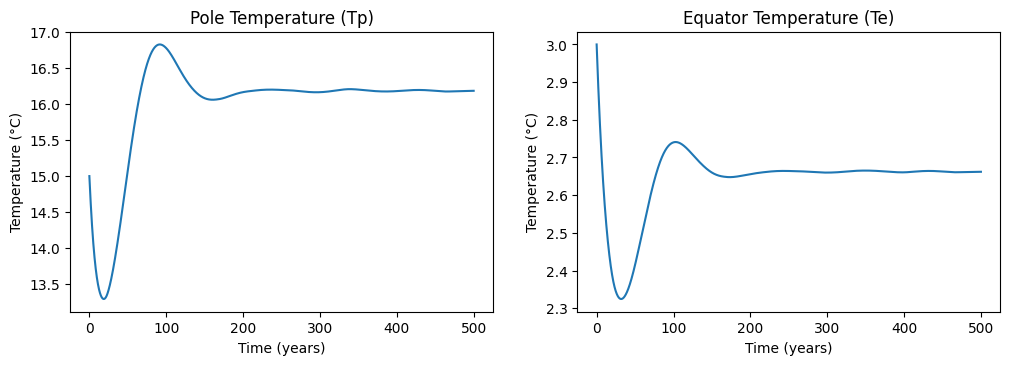

In [7]:
# Initial conditions
y0 = [15, 3]

# (source: google unit converter)
year_in_days = 365
day_in_seconds = 86400
nb_years = 500

# Time span
time_span = (0, nb_years * year_in_days * day_in_seconds)  # 500 years in seconds
time_eval = np.arange(0, time_span[1], day_in_seconds)  # Daily timesteps
# Solve for Case 1

sol_case1 = solve_ivp(compute_rhs_trajectories, time_span, y0, t_eval=time_eval,
                      args=(Te_a, Tp_a, gamma, V, alpha_S, alpha_T, tau, Fe), method='RK45')


DT, DS = sol_case1.y

print(len(DT))
print(len(time_eval))
# Plot temperatures and salinities
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(time_eval / (year_in_days * day_in_seconds), DT, label="Case 1: no climate change (Tp)")
plt.title("Pole Temperature (Tp)")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
# plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_eval / (year_in_days * day_in_seconds), DS, label="Case 1: no climate change (Te)")
plt.title("Equator Temperature (Te)")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
# plt.legend()



In [8]:

def find_all_steady_states(guesses, args):
    steady_states = []
    for guess in guesses:
        result = fsolve(compute_rhs_ex3, x0=guess, args=args)
        # Round the result to avoid numerical precision issues
        rounded_result = tuple(np.round(result, decimals=8))
        if rounded_result not in steady_states:
            steady_states.append(rounded_result)
    return np.array(steady_states)

def simulate_all_trajectories(starts, args):
    # Initial conditions
    trajectories = []
    for y0 in starts:

        # (source: google unit converter)
        year_in_days = 365
        day_in_seconds = 86400
        nb_years = 500

        # Time span
        time_span = (0, nb_years * year_in_days * day_in_seconds)  # 500 years in seconds
        time_eval = np.arange(0, time_span[1], day_in_seconds*year_in_days)  # Daily timesteps

        sol_case1 = solve_ivp(compute_rhs_trajectories, time_span, y0, t_eval=time_eval,
                            args=args, method='RK45')
        trajectories.append(sol_case1.y)
    return trajectories




# Generate a grid of initial guesses
delta_T_range = np.linspace(-5, 40, 200)  # Adjust range and steps as needed
delta_S_range = np.linspace(-5, 5, 200)  # Adjust range and steps as needed
initial_guesses = np.array([[dT, dS] for dT in delta_T_range for dS in delta_S_range]) 
    
all_steady_states = find_all_steady_states(initial_guesses, args = args)


# Generate a grid of initial guesses
delta_T_range = np.linspace(0, 30, 10)  # Adjust range and steps as needed
delta_S_range = np.linspace(0, 4, 10)  # Adjust range and steps as needed
initial_guesses = np.array([[dT, dS] for dT in delta_T_range for dS in delta_S_range])

# Find all steady states
all_trajectories = simulate_all_trajectories(initial_guesses, args=args)




C:\Users\pietr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\pietr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[[16.18436987  2.66207887]
 [ 9.73089187  0.68434912]]


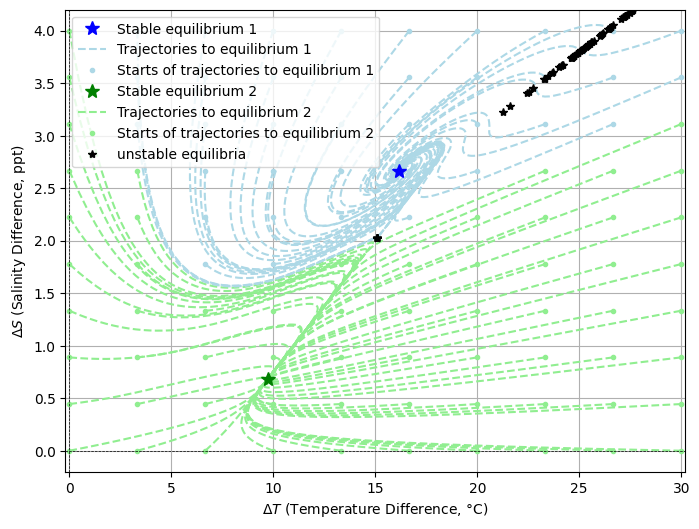

In [9]:


# Visualize steady states
plt.figure(figsize=(8, 6))

eq1 = []
eq2 = []
for traj in all_trajectories:
    equilibrium = (traj[0][-1], traj[1][-1])
    if equilibrium[1]>2:
        plt.plot(traj[0][0], traj[1][0], '.', color = "lightblue")
        plt.plot(traj[0], traj[1], '--', color = "lightblue")
        eq1.append([traj[0][-1], traj[1][-1]])
    else:
        plt.plot(traj[0][0], traj[1][0], '.', color = "lightgreen")
        plt.plot(traj[0], traj[1], '--', color = "lightgreen")
        eq2.append([traj[0][-1], traj[1][-1]])



plt.plot(all_steady_states.T[0], all_steady_states.T[1], "*",color='k' )

eq1 = np.array(eq1)
eq2 = np.array(eq2)


stableeq = np.array([np.mean(eq1, axis=0), np.mean(eq2, axis=0)])
print(stableeq)
a2 = plt.plot(stableeq[0][0], stableeq[0][1], '*', color = "blue", label='Stable equilibrium 1', markersize=10)
plt.plot([], [], '--', color='lightblue', label='Trajectories to equilibrium 1')  # Empty plot for legend
plt.plot([], [], '.', color='lightblue', label='Starts of trajectories to equilibrium 1')  # Empty plot for legend

a2 = plt.plot(stableeq[1][0], stableeq[1][1], '*', color = "green", label='Stable equilibrium 2', markersize=10)

plt.plot([], [], '--', color='lightgreen', label='Trajectories to equilibrium 2')  # Empty plot for legend
plt.plot([], [], '.', color='lightgreen', label='Starts of trajectories to equilibrium 2')  # Empty plot for legend

plt.plot([], [],"*",color='k', label = "unstable equilibria" )


plt.xlabel(r"$\Delta T$ (Temperature Difference, °C)")
plt.ylabel(r"$\Delta S$ (Salinity Difference, ppt)")
# plt.title("Steady States and equilibria in the (ΔT, ΔS) Plane")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.xlim([-.2, 30.2])
plt.ylim([-.2, 4.2])
plt.grid()
plt.show()


In [10]:
saddle = []
for state in all_steady_states:
    if 14.5 < state[0] <15.2: saddle.append (state)

np.mean(np.array(saddle), axis=0)

array([15.09638449,  2.02525664])